In [49]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from nltk import FreqDist
import seaborn as sns
pd.set_option("display.max_colwidth", 500)

# Reading in Data

In [50]:
df = pd.read_csv('C:/Users/wongzn/Desktop/final/df.csv')

In [51]:
df.head(3)

,Article Content,Article Link,Article Title,Topics
0,"SINGAPORE - A 21-year-old Malaysian suspect was arrested at the junction of Shenton Way and Maxwell Road last Thursday (Aug 1) after he allegedly disposed of a plastic bag containing 336g of Ice at a carpark in the vicinity of Orchard Towers. Officers from the Central Narcotics Bureau (CNB) had spotted him hopping onto his motorcycle in the carpark to make a hasty exit. They also recovered the plastic bag which contained 336g of Ice, valued at $33,000. This amount can feed the addiction of a...",https://www.straitstimes.com/singapore/suspected-drug-offender-arrested-at-shenton-way-junction-after-attempting-hasty-getaway-on,Malaysian drug suspect arrested at Shenton Way junction after attempting hasty getaway on motorbike,"CENTRAL NARCOTICS BUREAU, DRUG OFFENCES"
1,"SINGAPORE - When entering a pool of water, a person who does not know how to swim might not know to breathe in before entering, and to exhale slightly while submerged. As a result, it is possible he might inhale water while submerged. Forensic pathologist George Paul was pointing this out as he testified on Friday (June 14) in the ongoing trial of two commanders of the Singapore Civil Defence Force (SCDF) linked with the drowning of full-time national serviceman Corporal Kok Yuen Chin, which...",https://www.straitstimes.com/singapore/courts-crime/scdf-ragging-incident-non-swimmers-might-not-know-how-to-react-when-entering,"SCDF ragging death: Being submerged in dark, confined well could be dangerous even for a swimmer, says expert","SCDF, COURT TRIALS"
2,"SINGAPORE – The Republic should leverage on technology such as virtual simulation systems to better integrate people with special needs, including students, into society, said President Halimah Yacob. Speaking to reporters during a visit on Thursday (May 23) to Metta School, which caters to students from age 7 to 21 who have mild intellectual disability and autism, she said this should be done as part of the country’s Smart Nation push, which is a national effort to support better living usi...",https://www.straitstimes.com/singapore/education/use-technology-to-help-special-needs-students-integrate-as-part-of-smart-nation,Use technology to help people with special needs integrate as part of Smart Nation push: President Halimah,"SPECIAL NEEDS/SPECIAL EDUCATION, HALIMAH YACOB, SPECIAL EDUCATION SCHOOL, SMART CITIES"


# Splitting and Cleaning of Article Topics

In [4]:
df_topics = df.Topics.str.split(', ', expand=True)

In [5]:
df_topics = df_topics.rename(columns={0:"Topic 1",1:"Topic 2",2:"Topic 3",3:"Topic 4",4:"Topic 5",5:"Topic 6",6:"Topic 7",7:"Topic 8"})

In [6]:
df = pd.concat([df[['Article Title','Article Content']],df_topics[['Topic 1','Topic 2']]], axis=1)

In [7]:
df['Topic 1'] = df['Topic 1'].str.upper()
df['Topic 2'] = df['Topic 2'].str.upper()

In [8]:
#Getting Topic Frequency
freq_df = df_topics.melt()
freq_df= pd.DataFrame({'Frequency':freq_df['value'].value_counts()})
freq_df = freq_df.rename_axis('Topics').reset_index()

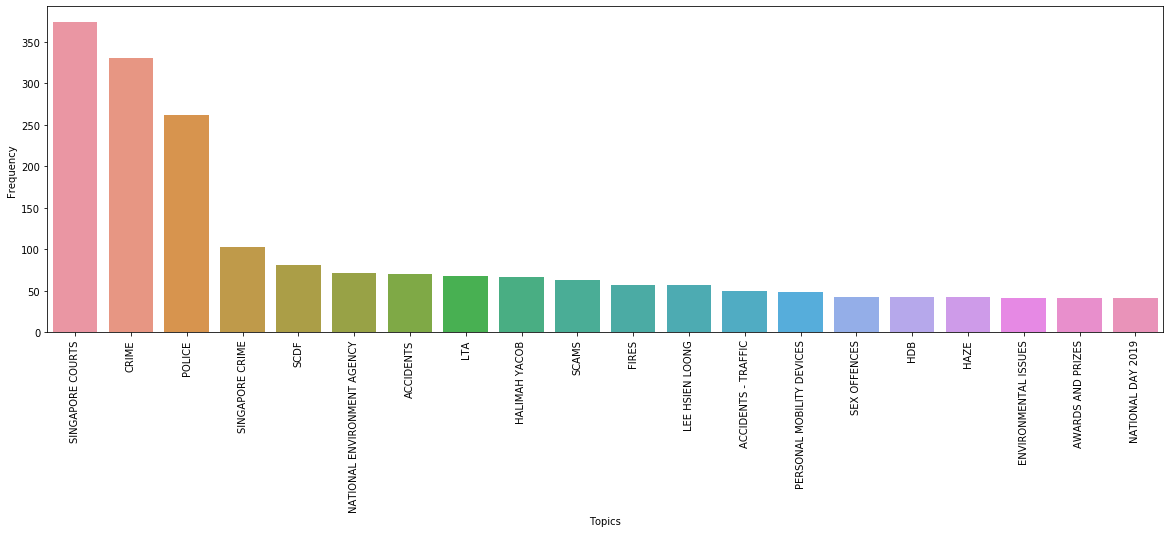

In [9]:
plt.figure(figsize=(20,6))
ax=sns.barplot(data=freq_df[:20],x="Topics",y="Frequency")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [10]:
#Grouping Topics
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=[r'\bUN\b','INTERPOL','^.*ASEAN.*$','^.*SHANGRI-LA DIALOGUE.*$','^.*HONG KONG.*$','^.*HK.*$','^.*KOREA.*$','^.*ZIMBABWE.*$','^.*ASIA-PACIFIC.*$','^.*AUSTRALIA.*$','^.*THAILAND.*$','^.*OBAMA.*$','^.*BREXIT.*$','^.*BELT AND ROAD.*$','^.*MALAYSIA.*$','^.*TAIWAN.*$','^.*KAZAKHSTAN.*$','^.*RIOT.*$','^.*INDIA.*$','^.*INDO.*$','^.*NEW ZEALAND.*$','^.*BOMB.*$','^.*BRITAIN.*$','^.*BRUNEI.*$','^.*BUSAN.*$','^.*PHILIPPINES.*$','^.*TERRORI.*$','^.*SAUDI.*$','^.*CAMBODIA.*$','^.*PAHANG.*$','^.*CHINA.*$','^.*VIETNAM.*$','^.*DENMARK.*$','^.*PROTEST.*$',r'\bWHO\b','^.*FRANCE.*$',r'\bEU\b','^.*ISIS.*$','^.*GREECE.*$',r'\bUS.*$','^.*JAPAN.*$','^.*JOHOR.*$','^.*G-.*$','^.*RUSSIA.*$','^.*WORLD TRADE.*$','TARIFFS','SCOTT MORRISON','^.*ARMENIA.*$','MYANMAR','^.*WAR.*$','^.*TURKMENISTAN.*$','^.*GERMANY.*$','OECD','^.*GLOBAL AFFAIR.*$','^.*TRIPARTISM.*$','^.*POLICTIC.*$'],value='GLOBAL POLITICS AND AFFAIRS')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*HARI RAYA.*$','^.*DEEPAVALI.*$','^.*FESTIVAL.*$','^.*CHURCH.*$','^.*BUDDHISM.*$','^.*ISLAM.*$','^.*MOSQUE.*$','^.*HINDU.*$','^.*TEMPLE.*$','^.*RACIAL.*$','^.*HARMONY.*$','^.*RACE.*$','^.*RELIGIO.*$','^.*CULTUR.*$','INSTITUTE OF POLICY STUDIES'],value='RACE AND RELIGION')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*ACCIDENT.*$','DROWNING','^.*FIRE.*$'],value='ACCIDENTS')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*CHARIT.*$','^.*VOLUNTEER.*$','^.*DONAT.*$','^.*KINDNESS.*$','^.*RED CROSS.*$','^.*PHILANTHROPY.*$'], value='CHARITY AND DONATION')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*RECYC.*$',r'\bPSI\b','^.*HAZE.*$','^.*ENVIRONMENT.*$','^.*CLIMATE.*$','^.*POLLUT.*$','^.*OIL SPILL.*$','^.*ELECTRICITY AND POWER.*$','^.*FLOOD.*$','^.*ENERGY.*$','^.*RENEWABLE.*$','^.*FOREST FIRE.*$','^.*PLASTIC.*$','^.*WASTE.*$','^.*WEATHER.*$','^.*WATER.*$','^.*CONSERVATION.*$','^.*WILDLIFE.*$','^.*RESERVES.*$','^.*TYPHOON.*$','^.*PARKS.*$','^.*ANIMAL.*$','^.*PLANTS.*$','^.*MARINE LIFE.*$','^.*SPECIES.*$','^.*BIODIVERSIT.*$','^.*MOUNT EVEREST.*$','^.*GREEN PULSE.*$','^.*RIVER.*$','^.*SUSTAINABLE.*$'], value='ENVIRONMENT AND NATURE')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*MODESTY.*$','^.*MURDER.*$',r'\bDATA LEAK\b','ROBBERY','^.*ADDICTION.*$','^.*DEATH.*$','^.*COUNTERFEIT.*$','PORNOGRAPHY','RAPE','BROTHELS','HARASSMENT','GANGS','RASH ACTS','^.*TRIAL.*$','^.*CRIME.*$','^.*CRIMINAL.*$','^.*COURT.*$','^.*OFFEN.*$','^.*ILLEGAL.*$','SCAMS','GAMBLING','SUICIDES','DISCIPLINARY PROCEEDINGS','^.*LAWSUITS.*$','LAW ENFORCEMENT','MONEY LAUNDERING','^.*PROSTITUTION.*$','VANDALISM','CHIEF JUSTICE','CHEATING','LAWYERS','SINGAPORE LAW','MINISTRY OF LAW','LAW FIRMS','^.*CORONER.*$','^.*CORRUPT.*$','^.*THEFT.*$','CHEATING','DRINK DRIVING','^.*HURT.*$','CENTRAL NARCOTICS BUREAU','^.*POLICE.*$','IMMIGRATION LAWS','^.*DRUG.*$','^.*EXTORTION.*$','ASSAULT','KONG HEE','^.*TAX EVASION.*$','PRISONS','FRAUD','LITTERING','SMUGGLING','^.*LAW.*$'],value='LAW, LEGISLATION AND CRIME')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*EMPLOY.*$', 'CAREERS', 'WORKING LIFE','ELDERLY WORKERS','SALARIES','LOW-WAGE WORKERS','WORKFORCE SINGAPORE', 'LABOUR ISSUES','ENTERPRISE SINGAPORE'], value='EMPLOYMENT')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*LABOUR.*$','MAIDS','^.*WORKPLACE SAFETY.*$','FOREIGN WORKERS','CONSTRUCTION SECTOR','MINISTRY OF MANPOWER','WORKER WELFARE'], value='EMPLOYMENT')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*CARE.*$',r'^.*CHAS \(COMMUNITY HEALTH ASSIST SCHEME\).*$'], value='HEALTH ASSISTANCE')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*MENTAL.*$','^.*STRESS.*$','^.*OBSESSIVE COMPULSIVE.*$', 'MIND & BODY','^.*COUNSELLORS.*$'], value='MENTAL HEALTH')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*HOSPITAL.*$','^.*HEALTH.*$','^.*MEDICAL.*$','^.*DOCTORS.*$','^.*PHAMA.*$', '^.*POLYCLINIC.*$'], value='DISEASES/HEALTH/HOSPITALS')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*RETAIL.*$','^.*SHOPPING.*$','^.*MALL.*$', '^.*TRAVEL PLAN.*$', '^.*TRAVEL AND LEISURE.*$','^.*HOTEL.*$','^.*CONCERT.*$',r'\bGSS\b'], value='SHOPPING AND LEISURE')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*JEWEL CHANGI.*$','^.*TOURISM.*$','^.*SENTOSA.*$','^.*GARDENS BY THE BAY.*$','^.*GRAND PRIX.*$','^.*FORMULA 1.*$','^.*MARINA BAY SAND.*$','^.*CASINO.*$','^.*BOTANIC GARDEN.*$', r'\bZOO\b'], value='SINGAPORE TOURISM/ATTRACTIONS')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*NATIONAL DAY.*$',], value='SG NATIONAL HOLIDAY')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*COMMUNITY.*$','GRASSROOTS ORGANISATIONS'], value='COMMUNITY')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*YOUTHS.*$','^.*PARENT.*$','FAMILIES','MINISTRY OF SOCIAL AND FAMILY DEVELOPMENT','PREGNANCY','DIVORCES','RETIREMENT','CHILDCARE CENTRES','CONFINEMENT','MARRIAGES',r'FATHER\'S DAY'], value='FAMILIY AND PARENTING')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*HERITAGE.*$','^.*BICENTENNIAL.*$','MUSEUMS & GALLERIES','^.*HISTOR.*$'], value='SG HISTORY/HERITAGE')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*POLYTECHNIC.*$','DESIGN EDUCATION','^.*SKILLS.*$','^.*KINDERGARTEN.*$', r'\bITE\b', '^.*LEARNING.*$','^.*SPECIAL NEEDS.*$','^.*SPECIAL EDUCATION.*$'], value='SCHOOLS AND EDUCATION')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*SCHO.*$', '^.*UNIVERSIT.*$','^.*EDUCATION.*$', r'\bNTU\b', r'\bNUS\b', r'\bSMU\b', r'\bSUTD\b', '^.*PSLE.*$', 'YALE-NUS', 'SINGAPORE INSTITUTE OF TECHNOLOGY','^.*TEACHER.*$','JUNIOR COLLEGE','^.*ACADEMIC.*$','^.*PRIMARY.*$','SUBJECT-BASED BANDING'], value='SCHOOLS AND EDUCATION')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*SINGAPORE ECONOMY.*$','SHARING ECONOMY','^.*ECONOMIC.*$',r'\bMAS\b','MINISTRY OF FINANCE','^.*TEMASEK HOL.*$',r'\bEDB\b', 'MINISTRY OF TRADE AND INDUSTRY','BUSINESS EXPANSION'], value='SG ECONOMY')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*SG CONNECT.*$','^.*SINGAPORE POLITIC.*$','^.*FOREIGN POLICY.*$'], value='SG TIES')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*CONDO.*$','^.*COST OF LIVING.*$',r'\bCOE\b','^.*HOUSING POLIC.*$','^.*PROPERTY.*$','^.*HOUSING.*$',r'\bHDB.*$', '^.*RENTAL.*$','^.*RENOVATION.*$','^.*RESALE.*$','^.*LAND PLANNING.*$','^.*URBAN PLANNING.*$','^.*HOUSING POLIC.*$'],value='HOUSING, LIVING AND DEVELOPMENT')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=[r'^.*PEOPLE\'S ASSOCIATION.*$', '^.*ELECTION.*$','^.*SINGAPORE PARLIAMENT.*$',r'\bPAP\b','MEMBERS OF PARLIAMENT',r'WORKER\'S PARTY',r'WORKERS\' PARTY', r'AUDITOR-GENERAL\'S OFFICE'], value='SG PARLIAMENT')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*TRANSPORT.*$',r'\bMRT\b',r'\bSBS.*$','^.*BUS.*$', r'\bSMRT\b','CROSS ISLAND LINE','^.*PERSONAL MOBILITY DEVICE.*$',r'\bLTA\b'], value='AIR/ROAD TRANSPORT AND POLICY')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*GRAB.*$','COMFORTDELGRO','^.*TAXI.*$','RIDE-HAILING APP.*$','GOJEK','PRIVATE CAR SHARING'], value='PRIVATE CAR HIRE AND TAXIS')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*AIRLINE.*$','^.*AIRPORT.*$','^.*AVIATION.*$','^.*CAAS.*$','^.*TRAVEL ADVISOR.*$','^.*AIRASIA.*$', '^.*AIR TRAFFIC CONTROL.*$','^.*AIRBUS.*$','^.*ROAD RULES.*$'], value='AIR/ROAD TRANSPORT AND POLICY')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=[r'\bICA\b','^.*SECURITY ISSUE.*$','^.*DEFENCE.*$','^.*MINISTRY OF FOREIGN AFFAIRS.*$','^.*NATIONAL SERVICE.*$','^.*SINGAPORE ARMY.*$','^.*DIPLOM.*$','^.*INTERNAL SECURITY.*$',r'\bSAF\b'], value='NATIONAL DEFENCE AND SECURITY')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=[r'\bSCDF\b',], value='ACCIDENTS')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*HYGIENE.*$','^.*BACTERIA.*$','SINGAPORE FOOD AGENCY','AGRI-FOOD & VETERINARY AUTHORITY OF SINGAPORE'], value='HYGIENE')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*CANCER.*$','^.*BLOOD.*$','^.*DIABETES.*$','^.*ILLNESS.*$', '^.*HEART.*$','STROKE','CHOLESTEROL','^.*DIALYSIS.*$','^.*HEPATITIS.*$','^.*DENGUE.*$','^.*MEASLES.*$','^.*MOSQUITO.*$','^.*AUTISM.*$','^.*ZIKA.*$','^.*OUTBREAKS AND.*$','^.*SUGAR.*$','^.*DISEASE.*$','DEMENTIA'], value='DISEASES/HEALTH/HOSPITALS')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*CYCLING.*$','^.*EXERCISE.*$','^.*NUTRITION.*$','^.*FOOD SECURITY.*$','^.*DIET.*$','^.*MARATHON.*$','^.*HEALTHY FOR.*$','^.*HEALTH PROMOTION BOARD.*$','^.*CAR-LITE.*$','^.*CAR-FREE.*$'], value='EXERCISE AND NUTRITION')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*MOBILE APP.*$', '^.*5G.*$','^.*FIBRE.*$','^.*INFOCOMM.*$','^.*SMARTPHONE.*$','^.*GOOGLE MAP.*$'], value='INFOCOMM TECHNOLOGY')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*CYBER SECURITY.*$','^.*HACKING.*$','DATA BREACH.*$','^.*INTERNET.*$'], value='CYBERTECHNOLOGY')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*ARTIFICIAL INTELLIGENCE.*$','^.*DIGITALISATION.*$','^.*ROBOT.*$','^.*AUGMENTED REALITY.*$','^.*3D.*$','^.*AUTOMATION.*$', '^.*SMART NATION.*$','^.*SMART CIT.*$','^.*CASHLESS SYSTEM.*$'], value='DIGITALISATION, AUTOMATION AND ML')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*DRONE.*$','TECHNOLOGY AND RESEARCH','TECHNOLOGY SECTOR',r'A\*STAR','^.*INNOVATION.*$'], value='TECHNOLOGY AND RESEARCH')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*AGEING.*$','^.*ELDER.*$','^.*SENIOR CITIZEN.*$', '^.*MERDEKA.*$'], value='ELDERLY AND AGEING POPULATION')

In [11]:
#Looping of Topics
Govt = ['LEE HSIEN LOONG', 'HALIMAH YACOB','HENG SWEE KEAT','NG ENG HEN','K SHANMUGAM','JOSEPHINE TEO','KHAW BOON WAN','MASAGOS ZULKIFLI','CHAN CHUN SING','ONG YE KUNG','TEO CHEE HEAN','LAM PIN MIN','GOH CHOK TONG','LAWRENCE WONG','SUN XUELING','^.*LEE BEE WAH.*$','^.*HENG CHEE HOW.*$','YAACOB IBRAHIM','CHIAM SEE TONG','VIVIAN BALAKRISHNAN','PRITAM SINGH','MUHAMMAD FAISHAL IBRAHIM','NG CHEE MENG','CHEE HONG TAT','EDWIN TONG','TAN CHUAN-JIN','GRACE FU','DESMOND CHOO','GAN KIM YONG','BAEY YAM KENG','LEE KUAN YEW','THARMAN SHANMUGARATNAM']
df['Topic 1'] = np.where(df['Topic 1'].isin(Govt),df['Topic 2'],df['Topic 1'])

In [12]:
Topic_list = ['Topic 1']
df = df.apply(lambda x: x.mask(x.map(x.value_counts())<20, 'OTHERS') if x.name in Topic_list else x)

In [13]:
freq_df_cleaned = df[['Topic 1']].melt()
freq_df_cleaned = pd.DataFrame({'Frequency':freq_df_cleaned['value'].value_counts()})
freq_df_cleaned = freq_df_cleaned.rename_axis('Topics').reset_index()
freq_df_cleaned['Perc']= round((freq_df_cleaned['Frequency']/sum(freq_df_cleaned.Frequency)*100)).astype(str) +'%'

In [14]:
freq_df_cleaned.head()

,Topics,Frequency,Perc
0,"LAW, LEGISLATION AND CRIME",671,26.0%
1,OTHERS,621,24.0%
2,ACCIDENTS,162,6.0%
3,ENVIRONMENT AND NATURE,146,6.0%
4,AIR/ROAD TRANSPORT AND POLICY,146,6.0%


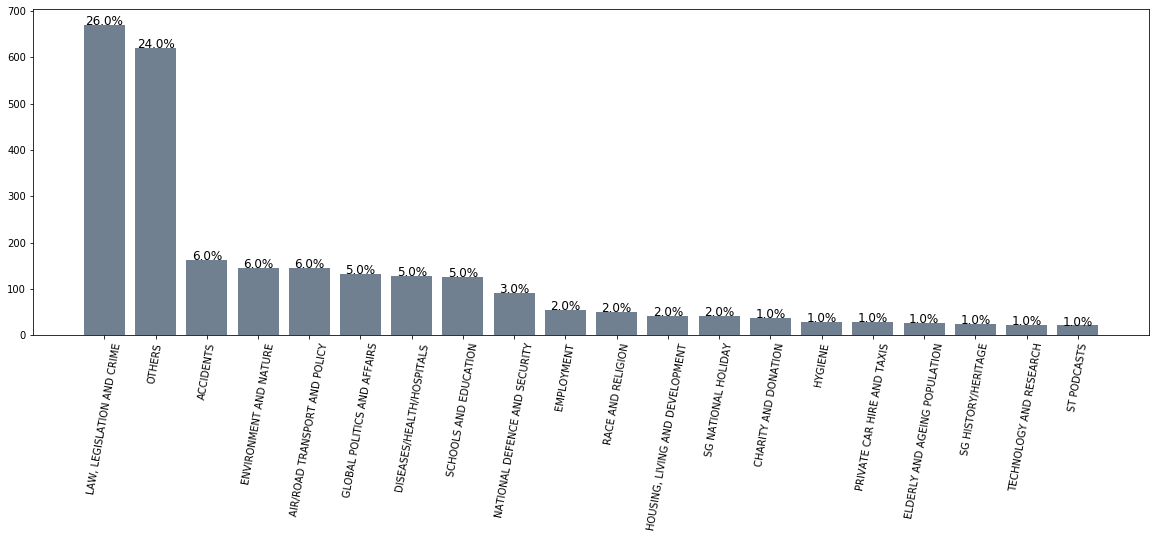

In [15]:
plt.figure(figsize=(20,6))
plt.bar(freq_df_cleaned['Topics'][:20],freq_df_cleaned['Frequency'][:20], color="slategray")
plt.xticks(rotation=80)
for i in range(len(freq_df_cleaned)):
    plt.text(freq_df_cleaned.Topics[i],freq_df_cleaned.Frequency[i], freq_df_cleaned.Perc[i], color='black', ha="center",size=12)
plt.show()

# Word Frequency

In [16]:
def freq_words(x, terms=30):
    all_words =' '.join([text for text in x])
    all_words = all_words.split()
    all_words = (x.lower() for x in all_words)
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    d = words_df.nlargest(columns="count",n=terms)
    plt.figure(figsize=(20,5))
    ax=sns.barplot(data=d,x="word",y="count")
    ax.set(ylabel='Count')
    plt.show()

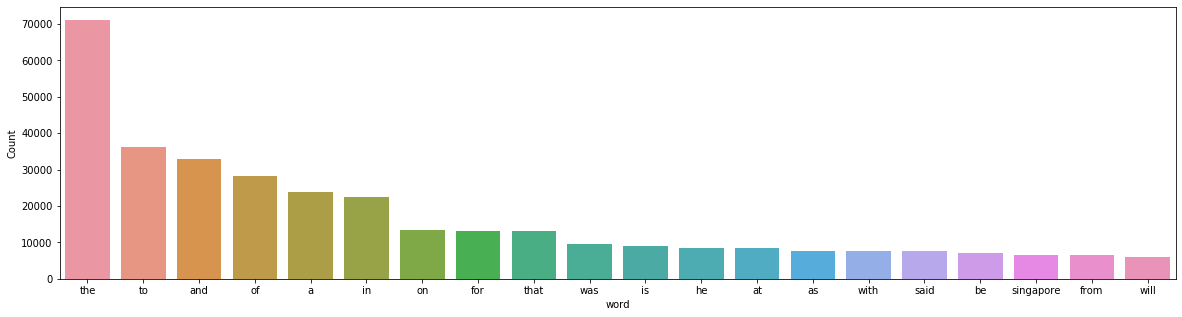

In [17]:
#Getting Top 20 Words
freq_words(df['Article Content'],20)

# Preprocessing 

In [18]:
def preprocess_content(column):
    column = column.apply(lambda x: re.sub(r'SINGAPORE -', ' ', x))
    #column = column.apply(lambda x: re.sub(r'SINGAPORE', ' ', x, flags=re.IGNORECASE))
    column = column.apply(lambda x: re.sub(r'\([^)]*\)', '',x)) #remove (anything in brackets)
    column = column.apply(lambda x: re.sub(r'\d{2}[/-]\w{4}[/-]\w{3,4}', '',x)) #remove(xx-year-old)
    #column = column.apply(lambda x: re.sub(r'straits times','',x, flags=re.IGNORECASE))
    #column = column.apply(lambda x: re.sub(r'per cent','',x, flags=re.IGNORECASE))
    column = column.apply(lambda x: re.sub(r'cpl kok yuen chin','',x, flags=re.IGNORECASE))
    column = column.apply(lambda x: re.sub(r'cpl kok','',x, flags=re.IGNORECASE))
    #column = column.apply(lambda x: re.sub(r'st photo','',x, flags=re.IGNORECASE))
    #column = column.apply(lambda x: re.sub(r'facebook post','',x, flags=re.IGNORECASE))
    #column = column.apply(lambda x: re.sub(r'years ago','',x, flags=re.IGNORECASE))
    column = column.apply(lambda x: re.sub(r'[^a-zA-z\s]', ' ', x)) #removing digits and special characters (punctuations)
    #column = column.apply(lambda x: x.lower()) #convert to lowercase
    column = column.apply(lambda x: re.sub('\n','',x))
    return column

df['Article Content'] = preprocess_content(df['Article Content'])

In [19]:
import spacy
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
add_words = ["singapore","said","also","year","month", "time", "last","years"]
stop_words.update(add_words)

In [20]:
def remove_stopwords(content):
    content_new = ' '.join([i for i in content if i.lower() not in stop_words])
    return content_new

df['Article Content'] = df['Article Content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [21]:
Article_content = [remove_stopwords(r.split()) for r in df['Article Content']]

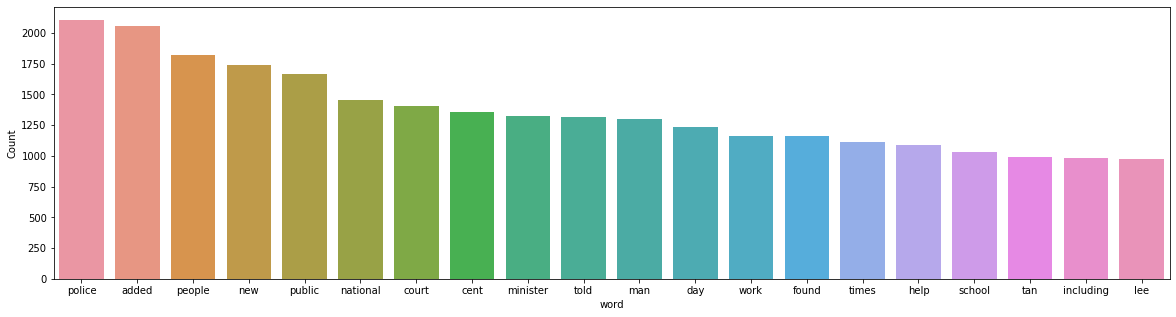

In [22]:
freq_words(Article_content,20)

In [23]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [24]:
def lemmatization(texts, tags=['NOUN','ADJ','ADV','VERB']):
    output=[]
    for sent in texts:
        doc = nlp(" ".join(sent))
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [25]:
tokenized_contents = pd.Series(Article_content).apply(lambda x: x.split())
#print(tokenized_contents[0])

In [26]:
lemmatized_contents = lemmatization(tokenized_contents)
#print(lemmatized_contents[0])

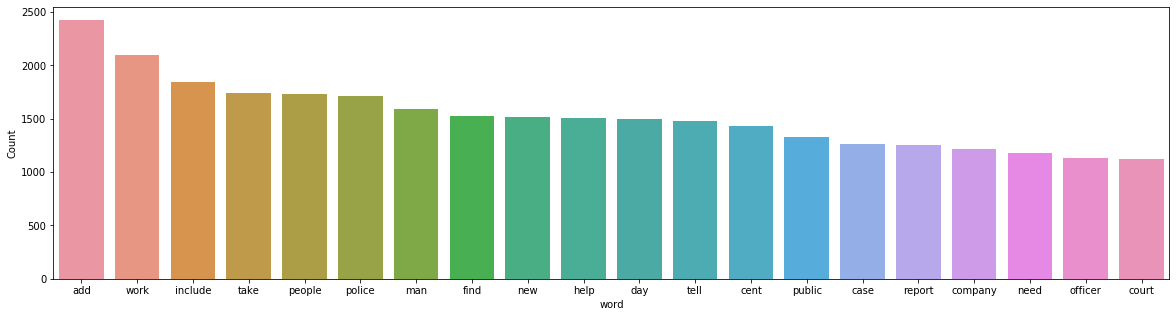

In [27]:
Article_content_clean = []
for i in range(len(lemmatized_contents)):
    Article_content_clean.append(' '.join(lemmatized_contents[i]))
df['clean_contents'] = Article_content_clean

#Getting Word Frequency of cleaned contents

freq_words(df['clean_contents'],20)

In [28]:
df['Clean Content'] = lemmatized_contents

#df.drop(columns=['Topic 2'],axis=1,inplace=True)

#Dropping Topics that is hard to classify
df = df[df['Topic 1'] != 'OTHERS'] #Topic < 20 in Frequency
df = df[df['Topic 1'] != 'SG NATIONAL HOLIDAY'] #About National Day, overlaps with many other topics
df = df[df['Topic 1'] != 'ST PODCASTS'] #Random Topics
df.head(3)

,Article Title,Article Content,Topic 1,Topic 2,clean_contents,Clean Content
0,Malaysian drug suspect arrested at Shenton Way junction after attempting hasty getaway on motorbike,Malaysian suspect was arrested the junction Shenton Way and Maxwell Road last Thursday after allegedly disposed plastic bag containing Ice carpark the vicinity Orchard Towers Officers from the Central Narcotics Bureau had spotted him hopping onto his motorcycle the carpark make hasty exit They also recovered the plastic bag which contained Ice valued This amount can feed the addiction about abusers for week the CNB said press release Saturday Three other suspected drug offenders including Si...,"LAW, LEGISLATION AND CRIME","LAW, LEGISLATION AND CRIME",malaysian suspect arrest junction allegedly dispose plastic bag contain carpark vicinity spot hop motorcycle carpark hasty exit recover plastic bag contain value feed addiction abuser week press release suspect drug offender include singaporean man arrest total seize malaysian suspect arrest late anti drug enforcement operation take place suspect drug offender arrest operation cover area include accord drug worth seize blitz include heroin cannabi ketamine tablet new psychoactive substance b...,"[malaysian, suspect, arrest, junction, allegedly, dispose, plastic, bag, contain, carpark, vicinity, spot, hop, motorcycle, carpark, hasty, exit, recover, plastic, bag, contain, value, feed, addiction, abuser, week, press, release, suspect, drug, offender, include, singaporean, man, arrest, total, seize, malaysian, suspect, arrest, late, anti, drug, enforcement, operation, take, place, suspect, drug, offender, arrest, operation, cover, area, include, accord, drug, worth, seize, blitz, includ..."
1,"SCDF ragging death: Being submerged in dark, confined well could be dangerous even for a swimmer, says expert",When entering pool water person who does not know how swim might not know breathe before entering and exhale slightly while submerged result possible might inhale water while submerged Forensic pathologist George Paul was pointing this out testified Friday the ongoing trial two commanders the Singapore Civil Defence Force linked with the drowning full time national serviceman Corporal Kok Yuen Chin which happened during ragging incident Paul who performed the autopsy said There also differen...,ACCIDENTS,"LAW, LEGISLATION AND CRIME",enter pool water person know swim know breathe enter exhale slightly submerge result possible inhale water submerge forensic pathologist point testify ongoing trial commander link drown national serviceman happen rag incident perform autopsy difference react prepare enter water sudden unexpected event unexpected result startled inhalatory response cause person breathe water add common misconception enter body water float body float decomposition person presence mind tread water come water ru...,"[enter, pool, water, person, know, swim, know, breathe, enter, exhale, slightly, submerge, result, possible, inhale, water, submerge, forensic, pathologist, point, testify, ongoing, trial, commander, link, drown, national, serviceman, happen, rag, incident, perform, autopsy, difference, react, prepare, enter, water, sudden, unexpected, event, unexpected, result, startled, inhalatory, response, cause, person, breathe, water, add, common, misconception, enter, body, water, float, body, float, ..."
2,Use technology to help people with special needs integrate as part of Smart Nation push: President Halimah,SINGAPORE The Republic should leverage technology such virtual simulation systems better integrate people with special needs including students into society said President Halimah Yacob Speaking reporters during visit Thursday Metta School which caters students from age who have mild intellectual disability and autism she said this should done part the country Smart Nation push which national effort support better living using technology Madam Halimah cited the virtual simulation systems ava..

# Modelling

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, precision_score, recall_score

Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(df['clean_contents'],df['Topic 1'],
                                                                 test_size=0.3,random_state=10)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

Tfidf_vect = TfidfVectorizer(lowercase=True,ngram_range=(1,3), min_df=5,max_df=0.9)
Tfidf_vect.fit(df['clean_contents'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(Train_X_Tfidf,Train_Y)
knn_predictions = knn.predict(Test_X_Tfidf)

print("KNN Accuracy Score -> ",accuracy_score(knn_predictions, Test_Y)*100)
print(classification_report(Test_Y,knn_predictions))

KNN Accuracy Score ->  78.29861111111111
                                 precision    recall  f1-score   support

                      ACCIDENTS       0.79      0.93      0.85        57
  AIR/ROAD TRANSPORT AND POLICY       0.80      0.80      0.80        45
           CHARITY AND DONATION       0.57      0.57      0.57         7
      DISEASES/HEALTH/HOSPITALS       0.79      0.73      0.76        37
  ELDERLY AND AGEING POPULATION       0.80      0.67      0.73         6
                     EMPLOYMENT       0.68      0.72      0.70        18
         ENVIRONMENT AND NATURE       0.75      0.67      0.71        49
    GLOBAL POLITICS AND AFFAIRS       0.69      0.63      0.66        35
HOUSING, LIVING AND DEVELOPMENT       0.75      0.55      0.63        11
                        HYGIENE       0.45      1.00      0.62         5
     LAW, LEGISLATION AND CRIME       0.87      0.89      0.88       212
  NATIONAL DEFENCE AND SECURITY       0.80      0.57      0.67        28
     PRIV

In [32]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
predictions_NB = Naive.predict(Test_X_Tfidf)

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print(classification_report(Test_Y,predictions_NB))

Naive Bayes Accuracy Score ->  55.729166666666664


C:\Users\wongzn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                 precision    recall  f1-score   support

                      ACCIDENTS       1.00      0.46      0.63        57
  AIR/ROAD TRANSPORT AND POLICY       1.00      0.36      0.52        45
           CHARITY AND DONATION       0.00      0.00      0.00         7
      DISEASES/HEALTH/HOSPITALS       1.00      0.27      0.43        37
  ELDERLY AND AGEING POPULATION       0.00      0.00      0.00         6
                     EMPLOYMENT       0.00      0.00      0.00        18
         ENVIRONMENT AND NATURE       0.92      0.45      0.60        49
    GLOBAL POLITICS AND AFFAIRS       0.59      0.57      0.58        35
HOUSING, LIVING AND DEVELOPMENT       1.00      0.09      0.17        11
                        HYGIENE       0.00      0.00      0.00         5
     LAW, LEGISLATION AND CRIME       0.47      1.00      0.64       212
  NATIONAL DEFENCE AND SECURITY       1.00      0.04      0.07        28
     PRIVATE CAR HIRE AND TAXIS       0.00      0.

In [33]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(random_state = 21)
tree.fit(Train_X_Tfidf,Train_Y)
tree_prediction = tree.predict(Test_X_Tfidf)

print("Tree Accuracy Score -> ",accuracy_score(Test_Y,tree_prediction)*100)
print(classification_report(Test_Y,tree_prediction))

Tree Accuracy Score ->  65.45138888888889
                                 precision    recall  f1-score   support

                      ACCIDENTS       0.83      0.84      0.83        57
  AIR/ROAD TRANSPORT AND POLICY       0.48      0.56      0.52        45
           CHARITY AND DONATION       0.08      0.14      0.11         7
      DISEASES/HEALTH/HOSPITALS       0.52      0.68      0.59        37
  ELDERLY AND AGEING POPULATION       0.00      0.00      0.00         6
                     EMPLOYMENT       0.33      0.28      0.30        18
         ENVIRONMENT AND NATURE       0.68      0.55      0.61        49
    GLOBAL POLITICS AND AFFAIRS       0.50      0.46      0.48        35
HOUSING, LIVING AND DEVELOPMENT       0.78      0.64      0.70        11
                        HYGIENE       0.00      0.00      0.00         5
     LAW, LEGISLATION AND CRIME       0.86      0.84      0.85       212
  NATIONAL DEFENCE AND SECURITY       0.41      0.43      0.42        28
     PRI

In [34]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class='multinomial',solver='newton-cg')
LR.fit(Train_X_Tfidf,Train_Y)
pred_LR = LR.predict(Test_X_Tfidf)

print("LR Accuracy Score -> ",accuracy_score(pred_LR, Test_Y)*100)
print(classification_report(Test_Y,pred_LR))

LR Accuracy Score ->  75.17361111111111


C:\Users\wongzn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                 precision    recall  f1-score   support

                      ACCIDENTS       0.94      0.86      0.90        57
  AIR/ROAD TRANSPORT AND POLICY       0.79      0.69      0.74        45
           CHARITY AND DONATION       0.67      0.29      0.40         7
      DISEASES/HEALTH/HOSPITALS       0.81      0.81      0.81        37
  ELDERLY AND AGEING POPULATION       1.00      0.17      0.29         6
                     EMPLOYMENT       0.86      0.33      0.48        18
         ENVIRONMENT AND NATURE       0.83      0.61      0.71        49
    GLOBAL POLITICS AND AFFAIRS       0.67      0.63      0.65        35
HOUSING, LIVING AND DEVELOPMENT       1.00      0.45      0.62        11
                        HYGIENE       0.80      0.80      0.80         5
     LAW, LEGISLATION AND CRIME       0.70      0.98      0.82       212
  NATIONAL DEFENCE AND SECURITY       0.93      0.46      0.62        28
     PRIVATE CAR HIRE AND TAXIS       0.00      0.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['linear'],'C': np.arange(1,5,0.1),'gamma':np.arange(0.01,1,0.1)}

grid = GridSearchCV(svm.SVC(), parameters, cv=5)
grid.fit(Train_X_Tfidf,Train_Y)
print(grid.best_params_)

In [ ]:
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(Test_X_Tfidf)

print("SVM Accuracy Score -> ",accuracy_score(grid_predictions, Test_Y)*100)
print(classification_report(Test_Y,grid_predictions))

In [35]:
SVM = svm.SVC(C=1.5, kernel='linear', degree=3,random_state=1)
SVM.fit(Train_X_Tfidf,Train_Y)
predictions_SVM = SVM.predict(Test_X_Tfidf)

print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  80.90277777777779


In [36]:
print(confusion_matrix(Test_Y,predictions_SVM))
print(classification_report(Test_Y,predictions_SVM))

[[ 52   2   0   0   0   0   0   0   0   0   2   0   1   0   0   0   0]
 [  0  35   0   0   0   1   0   2   0   0   4   0   0   0   0   0   3]
 [  0   0   6   0   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  32   0   0   0   1   0   1   0   0   0   0   3   0   0]
 [  0   0   0   3   1   0   0   1   0   0   1   0   0   0   0   0   0]
 [  1   0   0   0   0  11   0   1   0   0   3   1   0   0   1   0   0]
 [  0   1   1   2   0   1  36   1   0   0   7   0   0   0   0   0   0]
 [  0   1   0   1   0   1   2  21   0   0   4   3   0   0   2   0   0]
 [  1   0   0   0   0   0   1   0   5   0   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0   0   0   0   0   0   0]
 [  2   1   0   1   0   1   0   0   0   0 203   1   0   0   3   0   0]
 [  0   1   0   0   0   0   1   2   0   0   2  18   0   0   3   0   1]
 [  0   3   0   0   0   0   0   0   0   0   2   0   4   0   0   0   0]
 [  0   0   1   0   0   0   0   2   0   0   1   0   0   9   1   0   0]
 [  0 

# Feeding in New Data (Test Dataset)

In [37]:
new_data = pd.read_csv('C:/Users/wongzn/Desktop/Transfer/ST_63.csv')
new_data['Article Content'] = new_data['Article Content'].astype(str)

In [38]:
Train_X = df['clean_contents']
Train_Y = df['Topic 1']

In [39]:
#Preprocess test dataset like before
df = new_data
df_topics = df.Topics.str.split(', ', expand=True)
df_topics = df_topics.rename(columns={0:"Topic 1",1:"Topic 2",2:"Topic 3",3:"Topic 4",4:"Topic 5",5:"Topic 6",6:"Topic 7",7:"Topic 8"})
df = pd.concat([df[['Article Title','Article Content']],df_topics[['Topic 1','Topic 2']]], axis=1)
df['Topic 1'] = df['Topic 1'].str.upper()
df['Topic 2'] = df['Topic 2'].str.upper()

In [40]:
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=[r'\bUN\b','INTERPOL','^.*ASEAN.*$','^.*SHANGRI-LA DIALOGUE.*$','^.*HONG KONG.*$','^.*HK.*$','^.*KOREA.*$','^.*ZIMBABWE.*$','^.*ASIA-PACIFIC.*$','^.*AUSTRALIA.*$','^.*THAILAND.*$','^.*OBAMA.*$','^.*BREXIT.*$','^.*BELT AND ROAD.*$','^.*MALAYSIA.*$','^.*TAIWAN.*$','^.*KAZAKHSTAN.*$','^.*RIOT.*$','^.*INDIA.*$','^.*INDO.*$','^.*NEW ZEALAND.*$','^.*BOMB.*$','^.*BRITAIN.*$','^.*BRUNEI.*$','^.*BUSAN.*$','^.*PHILIPPINES.*$','^.*TERRORI.*$','^.*SAUDI.*$','^.*CAMBODIA.*$','^.*PAHANG.*$','^.*CHINA.*$','^.*VIETNAM.*$','^.*DENMARK.*$','^.*PROTEST.*$',r'\bWHO\b','^.*FRANCE.*$',r'\bEU\b','^.*ISIS.*$','^.*GREECE.*$',r'\bUS.*$','^.*JAPAN.*$','^.*JOHOR.*$','^.*G-.*$','^.*RUSSIA.*$','^.*WORLD TRADE.*$','TARIFFS','SCOTT MORRISON','^.*ARMENIA.*$','MYANMAR','^.*WAR.*$','^.*TURKMENISTAN.*$','^.*GERMANY.*$','OECD','^.*GLOBAL AFFAIR.*$','^.*TRIPARTISM.*$','^.*POLICTIC.*$'],value='GLOBAL POLITICS AND AFFAIRS')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*HARI RAYA.*$','^.*DEEPAVALI.*$','^.*FESTIVAL.*$','^.*CHURCH.*$','^.*BUDDHISM.*$','^.*ISLAM.*$','^.*MOSQUE.*$','^.*HINDU.*$','^.*TEMPLE.*$','^.*RACIAL.*$','^.*HARMONY.*$','^.*RACE.*$','^.*RELIGIO.*$','^.*CULTUR.*$','INSTITUTE OF POLICY STUDIES'],value='RACE AND RELIGION')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*ACCIDENT.*$','DROWNING','^.*FIRE.*$'],value='ACCIDENTS')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*CHARIT.*$','^.*VOLUNTEER.*$','^.*DONAT.*$','^.*KINDNESS.*$','^.*RED CROSS.*$','^.*PHILANTHROPY.*$'], value='CHARITY AND DONATION')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*RECYC.*$',r'\bPSI\b','^.*HAZE.*$','^.*ENVIRONMENT.*$','^.*CLIMATE.*$','^.*POLLUT.*$','^.*OIL SPILL.*$','^.*ELECTRICITY AND POWER.*$','^.*FLOOD.*$','^.*ENERGY.*$','^.*RENEWABLE.*$','^.*FOREST FIRE.*$','^.*PLASTIC.*$','^.*WASTE.*$','^.*WEATHER.*$','^.*WATER.*$','^.*CONSERVATION.*$','^.*WILDLIFE.*$','^.*RESERVES.*$','^.*TYPHOON.*$','^.*PARKS.*$','^.*ANIMAL.*$','^.*PLANTS.*$','^.*MARINE LIFE.*$','^.*SPECIES.*$','^.*BIODIVERSIT.*$','^.*MOUNT EVEREST.*$','^.*GREEN PULSE.*$','^.*RIVER.*$','^.*SUSTAINABLE.*$'], value='ENVIRONMENT AND NATURE')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*MODESTY.*$','^.*MURDER.*$',r'\bDATA LEAK\b','ROBBERY','^.*ADDICTION.*$','^.*DEATH.*$','^.*COUNTERFEIT.*$','PORNOGRAPHY','RAPE','BROTHELS','HARASSMENT','GANGS','RASH ACTS','^.*TRIAL.*$','^.*CRIME.*$','^.*CRIMINAL.*$','^.*COURT.*$','^.*OFFEN.*$','^.*ILLEGAL.*$','SCAMS','GAMBLING','SUICIDES','DISCIPLINARY PROCEEDINGS','^.*LAWSUITS.*$','LAW ENFORCEMENT','MONEY LAUNDERING','^.*PROSTITUTION.*$','VANDALISM','CHIEF JUSTICE','CHEATING','LAWYERS','SINGAPORE LAW','MINISTRY OF LAW','LAW FIRMS','^.*CORONER.*$','^.*CORRUPT.*$','^.*THEFT.*$','CHEATING','DRINK DRIVING','^.*HURT.*$','CENTRAL NARCOTICS BUREAU','^.*POLICE.*$','IMMIGRATION LAWS','^.*DRUG.*$','^.*EXTORTION.*$','ASSAULT','KONG HEE','^.*TAX EVASION.*$','PRISONS','FRAUD','LITTERING','SMUGGLING','^.*LAW.*$'],value='LAW, LEGISLATION AND CRIME')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*EMPLOY.*$', 'CAREERS', 'WORKING LIFE','ELDERLY WORKERS','SALARIES','LOW-WAGE WORKERS','WORKFORCE SINGAPORE', 'LABOUR ISSUES','ENTERPRISE SINGAPORE'], value='EMPLOYMENT')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*LABOUR.*$','MAIDS','^.*WORKPLACE SAFETY.*$','FOREIGN WORKERS','CONSTRUCTION SECTOR','MINISTRY OF MANPOWER','WORKER WELFARE'], value='EMPLOYMENT')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*CARE.*$',r'^.*CHAS \(COMMUNITY HEALTH ASSIST SCHEME\).*$'], value='HEALTH ASSISTANCE')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*MENTAL.*$','^.*STRESS.*$','^.*OBSESSIVE COMPULSIVE.*$', 'MIND & BODY','^.*COUNSELLORS.*$'], value='MENTAL HEALTH')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*HOSPITAL.*$','^.*HEALTH.*$','^.*MEDICAL.*$','^.*DOCTORS.*$','^.*PHAMA.*$', '^.*POLYCLINIC.*$'], value='DISEASES/HEALTH/HOSPITALS')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*RETAIL.*$','^.*SHOPPING.*$','^.*MALL.*$', '^.*TRAVEL PLAN.*$', '^.*TRAVEL AND LEISURE.*$','^.*HOTEL.*$','^.*CONCERT.*$',r'\bGSS\b'], value='SHOPPING AND LEISURE')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*JEWEL CHANGI.*$','^.*TOURISM.*$','^.*SENTOSA.*$','^.*GARDENS BY THE BAY.*$','^.*GRAND PRIX.*$','^.*FORMULA 1.*$','^.*MARINA BAY SAND.*$','^.*CASINO.*$','^.*BOTANIC GARDEN.*$', r'\bZOO\b'], value='SINGAPORE TOURISM/ATTRACTIONS')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*NATIONAL DAY.*$',], value='SG NATIONAL HOLIDAY')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*COMMUNITY.*$','GRASSROOTS ORGANISATIONS'], value='COMMUNITY')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*YOUTHS.*$','^.*PARENT.*$','FAMILIES','MINISTRY OF SOCIAL AND FAMILY DEVELOPMENT','PREGNANCY','DIVORCES','RETIREMENT','CHILDCARE CENTRES','CONFINEMENT','MARRIAGES',r'FATHER\'S DAY'], value='FAMILIY AND PARENTING')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*HERITAGE.*$','^.*BICENTENNIAL.*$','MUSEUMS & GALLERIES','^.*HISTOR.*$'], value='SG HISTORY/HERITAGE')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*POLYTECHNIC.*$','DESIGN EDUCATION','^.*SKILLS.*$','^.*KINDERGARTEN.*$', r'\bITE\b', '^.*LEARNING.*$','^.*SPECIAL NEEDS.*$','^.*SPECIAL EDUCATION.*$'], value='SCHOOLS AND EDUCATION')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*SCHO.*$', '^.*UNIVERSIT.*$','^.*EDUCATION.*$', r'\bNTU\b', r'\bNUS\b', r'\bSMU\b', r'\bSUTD\b', '^.*PSLE.*$', 'YALE-NUS', 'SINGAPORE INSTITUTE OF TECHNOLOGY','^.*TEACHER.*$','JUNIOR COLLEGE','^.*ACADEMIC.*$','^.*PRIMARY.*$','SUBJECT-BASED BANDING'], value='SCHOOLS AND EDUCATION')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*SINGAPORE ECONOMY.*$','SHARING ECONOMY','^.*ECONOMIC.*$',r'\bMAS\b','MINISTRY OF FINANCE','^.*TEMASEK HOL.*$',r'\bEDB\b', 'MINISTRY OF TRADE AND INDUSTRY','BUSINESS EXPANSION'], value='SG ECONOMY')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*SG CONNECT.*$','^.*SINGAPORE POLITIC.*$','^.*FOREIGN POLICY.*$'], value='SG TIES')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*CONDO.*$','^.*COST OF LIVING.*$',r'\bCOE\b','^.*HOUSING POLIC.*$','^.*PROPERTY.*$','^.*HOUSING.*$',r'\bHDB.*$', '^.*RENTAL.*$','^.*RENOVATION.*$','^.*RESALE.*$','^.*LAND PLANNING.*$','^.*URBAN PLANNING.*$','^.*HOUSING POLIC.*$'],value='HOUSING, LIVING AND DEVELOPMENT')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=[r'^.*PEOPLE\'S ASSOCIATION.*$', '^.*ELECTION.*$','^.*SINGAPORE PARLIAMENT.*$',r'\bPAP\b','MEMBERS OF PARLIAMENT',r'WORKER\'S PARTY',r'WORKERS\' PARTY', r'AUDITOR-GENERAL\'S OFFICE'], value='SG PARLIAMENT')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*TRANSPORT.*$',r'\bMRT\b',r'\bSBS.*$','^.*BUS.*$', r'\bSMRT\b','CROSS ISLAND LINE','^.*PERSONAL MOBILITY DEVICE.*$',r'\bLTA\b'], value='AIR/ROAD TRANSPORT AND POLICY')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*GRAB.*$','COMFORTDELGRO','^.*TAXI.*$','RIDE-HAILING APP.*$','GOJEK','PRIVATE CAR SHARING'], value='PRIVATE CAR HIRE AND TAXIS')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*AIRLINE.*$','^.*AIRPORT.*$','^.*AVIATION.*$','^.*CAAS.*$','^.*TRAVEL ADVISOR.*$','^.*AIRASIA.*$', '^.*AIR TRAFFIC CONTROL.*$','^.*AIRBUS.*$','^.*ROAD RULES.*$'], value='AIR/ROAD TRANSPORT AND POLICY')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=[r'\bICA\b','^.*SECURITY ISSUE.*$','^.*DEFENCE.*$','^.*MINISTRY OF FOREIGN AFFAIRS.*$','^.*NATIONAL SERVICE.*$','^.*SINGAPORE ARMY.*$','^.*DIPLOM.*$','^.*INTERNAL SECURITY.*$',r'\bSAF\b'], value='NATIONAL DEFENCE AND SECURITY')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=[r'\bSCDF\b',], value='ACCIDENTS')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*HYGIENE.*$','^.*BACTERIA.*$','SINGAPORE FOOD AGENCY','AGRI-FOOD & VETERINARY AUTHORITY OF SINGAPORE'], value='HYGIENE')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*CANCER.*$','^.*BLOOD.*$','^.*DIABETES.*$','^.*ILLNESS.*$', '^.*HEART.*$','STROKE','CHOLESTEROL','^.*DIALYSIS.*$','^.*HEPATITIS.*$','^.*DENGUE.*$','^.*MEASLES.*$','^.*MOSQUITO.*$','^.*AUTISM.*$','^.*ZIKA.*$','^.*OUTBREAKS AND.*$','^.*SUGAR.*$','^.*DISEASE.*$','DEMENTIA'], value='DISEASES/HEALTH/HOSPITALS')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*CYCLING.*$','^.*EXERCISE.*$','^.*NUTRITION.*$','^.*FOOD SECURITY.*$','^.*DIET.*$','^.*MARATHON.*$','^.*HEALTHY FOR.*$','^.*HEALTH PROMOTION BOARD.*$','^.*CAR-LITE.*$','^.*CAR-FREE.*$'], value='EXERCISE AND NUTRITION')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*MOBILE APP.*$', '^.*5G.*$','^.*FIBRE.*$','^.*INFOCOMM.*$','^.*SMARTPHONE.*$','^.*GOOGLE MAP.*$'], value='INFOCOMM TECHNOLOGY')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*CYBER SECURITY.*$','^.*HACKING.*$','DATA BREACH.*$','^.*INTERNET.*$'], value='CYBERTECHNOLOGY')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*ARTIFICIAL INTELLIGENCE.*$','^.*DIGITALISATION.*$','^.*ROBOT.*$','^.*AUGMENTED REALITY.*$','^.*3D.*$','^.*AUTOMATION.*$', '^.*SMART NATION.*$','^.*SMART CIT.*$','^.*CASHLESS SYSTEM.*$'], value='DIGITALISATION, AUTOMATION AND ML')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*DRONE.*$','TECHNOLOGY AND RESEARCH','TECHNOLOGY SECTOR',r'A\*STAR','^.*INNOVATION.*$'], value='TECHNOLOGY AND RESEARCH')
df[['Topic 1','Topic 2']] = df[['Topic 1','Topic 2']].replace(regex=['^.*AGEING.*$','^.*ELDER.*$','^.*SENIOR CITIZEN.*$', '^.*MERDEKA.*$'], value='ELDERLY AND AGEING POPULATION')

Govt = ['LEE HSIEN LOONG', 'HALIMAH YACOB','HENG SWEE KEAT','NG ENG HEN','K SHANMUGAM','AMY KHOR','JOSEPHINE TEO','KHAW BOON WAN','MASAGOS ZULKIFLI','CHAN CHUN SING','ONG YE KUNG','TEO CHEE HEAN','LAM PIN MIN','GOH CHOK TONG','LAWRENCE WONG','SUN XUELING','^.*LEE BEE WAH.*$','^.*HENG CHEE HOW.*$','YAACOB IBRAHIM','CHIAM SEE TONG','VIVIAN BALAKRISHNAN','PRITAM SINGH','MUHAMMAD FAISHAL IBRAHIM','NG CHEE MENG','CHEE HONG TAT','EDWIN TONG','TAN CHUAN-JIN','GRACE FU','DESMOND CHOO','GAN KIM YONG','BAEY YAM KENG','LEE KUAN YEW','THARMAN SHANMUGARATNAM']
df['Topic 1'] = np.where(df['Topic 1'].isin(Govt),df['Topic 2'],df['Topic 1'])
df['Article Content'] = preprocess_content(df['Article Content'])

In [41]:
df['Article Content'] = df['Article Content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
Article_content = [remove_stopwords(r.split()) for r in df['Article Content']]

tokenized_contents = pd.Series(Article_content).apply(lambda x: x.split())
lemmatized_contents = lemmatization(tokenized_contents)

Article_content_clean = []
for i in range(len(lemmatized_contents)):
    Article_content_clean.append(' '.join(lemmatized_contents[i]))
    
df['clean_contents'] = Article_content_clean
df['Clean Content'] = lemmatized_contents

#df.drop(columns=['Topic 2'],axis=1,inplace=True)

df = df[df['Topic 1'] != 'OTHERS']
df = df[df['Topic 1'] != 'SG NATIONAL HOLIDAY']
df = df[df['Topic 1'] != 'ST PODCASTS']

In [42]:
Test_X = df['clean_contents']
Test_Y = df['Topic 1']

In [43]:
Tfidf_vect = TfidfVectorizer(lowercase=True, min_df=5,max_df=0.9)
Tfidf_vect.fit(Train_X)

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [44]:
SVM = svm.SVC(C=1.5, kernel='linear', degree=3,gamma=0.01,random_state=1)
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
#print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

In [46]:
test_check = pd.concat([df[['Article Title','Article Content','Topic 1']],pd.DataFrame(predictions_SVM)], axis=1,ignore_index=True)
test_check = test_check.rename(columns={0:"Article Title",1:"Article Content",2:"Straits Times Topics",3:"SVM Predictions"})

In [47]:
pd.set_option("display.max_colwidth", 500)
test_check.iloc[[0,2,13,18,62]] #Articles to be shown on slides (Same throughout)

,Article Title,Article Content,Straits Times Topics,SVM Predictions
0,Seafood restaurant in Punggol stops using live crab claw machine after public outcry,The seafood restaurant Punggol has stopped using machine where customers can catch their own live Sri Lankan crabs Thursday the House Seafood restaurant said Facebook that has stopped using the machine temporarily and apologised for causing public unhappiness over its gimmick The turn came day after was called out Facebook Society for the Prevention Cruelty Animals being cruel the crabs the machine inflicted unnecessary harm and distress the crab will dropped from height the claw did not int...,ENVIRONMENT AND NATURE,ENVIRONMENT AND NATURE
2,Skills framework launched for workplace safety and health officers,Workplace safety and health officers will now get clearer idea the skills needed for their job and how they can progress their careers skills framework for such officers was launched Minister for Manpower Josephine Teo Thursday the Workplace Safety and Health Officers Conference held the Marina Bay Sands Expo and Convention Centre The framework provides key information the workplace safety and health sector the career pathways available those the industry and the possible job roles they can ...,EMPLOYMENT,EMPLOYMENT
13,SUTD students challenged to turn problems into opportunities through interdisciplinary studies,Students the Singapore University Technology and Design have been challenged Deputy Prime Minister and Finance Minister Heng Swee Keat make Singapore better nation design through their interdisciplinary studies that can turn national and global challenges into opportunities Speaking the university anniversary gala dinner Wednesday Heng said SUTD students whose curriculum integrates systems and design thinking are well placed help Singapore deal with challenges such climate change growing the...,SCHOOLS AND EDUCATION,SCHOOLS AND EDUCATION
18,Devotee in stable condition after falling into fire pit while fulfilling vows: HEB and temple,devotee tripped and fell into fire pit while fulfilling his vows Sunday the Sri Mariamman Temple Chinatown the Hindu Endowments Board and the temple said Tuesday many seven rescuers quickly attended the devotee and medical team rushed him the Singapore General Hospital The devotee stable condition The temple management has also visited him hospital and will continue monitor his progress the board and the temple said Facebook post Tuesday Two people who helped him also suffered injuries durin...,RACE AND RELIGION,ACCIDENTS
62,GrabFood looking into video of delivery rider using PMD on PIE,Delivery service GrabFood looking into incident which rider was seen using his personal mobility device expressway video posted Facebook man wearing GrabFood shirt seen riding scooter the Pan Island Expressway Facebook user Kurt Guo who posted the clip said that saw the rider the PIE the Upper Serangoon Road exit about Saturday the seven second video the PMD rider seen chevron road marking the expressway checking for traffic before riding across the road towards the Kallang Park Connector Gr...,PRIVATE CAR HIRE AND TAXIS,"LAW, LEGISLATION AND CRIME"
